In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Relationship between eig and SVD for a square symmetric matrix

In [249]:
# Create the symmetric matrix
m = 5
A = np.random.randn(m,m)
A = A.T@A

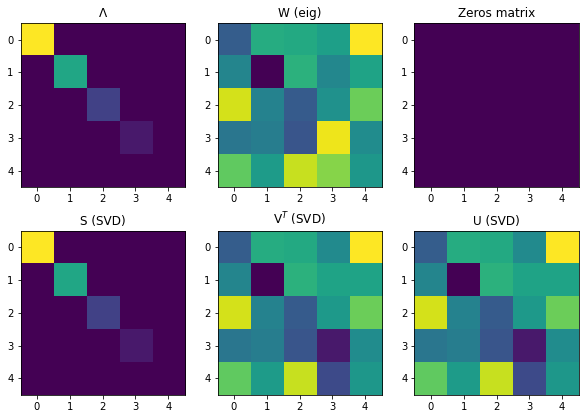

[[-0.4133  0.1759  0.154  -0.078   0.8766]
 [-0.1252 -0.9556  0.2203  0.1093  0.1037]
 [ 0.7599 -0.1449 -0.4294  0.0273  0.4652]
 [-0.233  -0.1803 -0.4736 -0.8275 -0.0641]
 [ 0.4264  0.0496  0.7204 -0.5445  0.0161]]
[[-0.4133  0.1759  0.154  -0.078   0.8766]
 [-0.1252 -0.9556  0.2203  0.1093  0.1037]
 [ 0.7599 -0.1449 -0.4294  0.0273  0.4652]
 [-0.233  -0.1803 -0.4736 -0.8275 -0.0641]
 [ 0.4264  0.0496  0.7204 -0.5445  0.0161]]
[[-0.4133  0.1759  0.154   0.078   0.8766]
 [-0.1252 -0.9556  0.2203 -0.1093  0.1037]
 [ 0.7599 -0.1449 -0.4294 -0.0273  0.4652]
 [-0.233  -0.1803 -0.4736  0.8275 -0.0641]
 [ 0.4264  0.0496  0.7204  0.5445  0.0161]]
[16.68482346  9.86510416  3.25784333  1.16242078  0.02422268]
[16.68482346  9.86510416  3.25784333  1.16242078  0.02422268]


In [253]:
# Compute eig and SVD
L,W = np.linalg.eig(A)
U,S,V = np.linalg.svd(A)

# Sort eig outputs
sidx = np.argsort(L)[::-1]
L = L[sidx]
W = W[:,sidx]

# Images of all matrices

fig,ax = plt.subplots(2,3,figsize=(10,7))

ax[0,0].imshow(np.diag(L))
ax[0,0].set_title('$\Lambda$')
ax[0,1].imshow(W)
ax[0,1].set_title('W (eig)')
ax[0,2].imshow(np.zeros((5,5)))
ax[0,2].set_title('Zeros matrix')

ax[1,0].imshow(np.diag(S))
ax[1,0].set_title('S (SVD)')
ax[1,1].imshow(V.T)
ax[1,1].set_title('V$^{T}$ (SVD)')
ax[1,2].imshow(U)
ax[1,2].set_title('U (SVD)')

plt.show()

print(np.round(U,decimals=4))
print(np.round(V.T,decimals=4))
print(np.round(W,decimals=4))
print(L)
print(S)

In [122]:
c = np.array([[3,1,0],[1,1,0]])
d,eigvecs = np.linalg.eig(c@c.T)
u,s,v = np.linalg.svd(c)
print(d)
print(s**2)

[11.65685425  0.34314575]
[11.65685425  0.34314575]


### U from eigendecomposition of A^TA

In [135]:
# Create a random rectangular matrix
m = 3
n = 6
A = np.random.randn(m,n)

In [211]:
# Compute eig and SVD
Us,Ss,Vs = np.linalg.svd(A)
L,V = np.linalg.eig(A.T@A)

# Confirm that V = Vs
# The subspace that both span is the same but basis could be different
rslt = np.round(V-Vs.T,2)
print(rslt)

# Sort eigensolution
sidx = np.argsort(L)[::-1]
L = L[sidx]
V = V[:,sidx]

# Check the relationship between L and Ss
# We apply eig to A^TA, so we need to square Ss  
print(L)
print(Ss**2)

# Create U using A,V,L
U = np.zeros((m,m))

for i in range(m):
    U[:,i] = (A@V[:,i].T)/np.sqrt(L[i])

print(U)
print(Us)
print(np.round(U-Us,3))

[[ 0.69 -0.    0.   -0.55 -0.5  -0.24]
 [-1.3   0.   -0.    0.11 -0.41 -0.1 ]
 [ 0.96 -0.    0.    0.09  0.17 -0.29]
 [-0.92  0.   -0.   -0.5   0.43 -0.59]
 [ 0.17  0.   -0.   -0.53  0.26 -0.6 ]
 [ 0.23  0.    0.    0.25 -0.   -0.6 ]]
[ 8.03420117e+00  5.48367747e+00  2.29491972e+00  4.32507862e-16
  3.11340180e-16 -3.22992869e-16]
[8.03420117 5.48367747 2.29491972]
[[-0.53271764 -0.45975491  0.71051906]
 [ 0.83542021 -0.15153751  0.5283081 ]
 [-0.13522195  0.87502103  0.46481525]]
[[ 0.53271764 -0.45975491  0.71051906]
 [-0.83542021 -0.15153751  0.5283081 ]
 [ 0.13522195  0.87502103  0.46481525]]
[[-1.065  0.    -0.   ]
 [ 1.671 -0.     0.   ]
 [-0.27  -0.    -0.   ]]


### AtAAv = Avs  y AAtAv = Avs

In [213]:
m = 4
A = np.random.randn(m,m)
AtA = A.T@A
AAt = A@A.T

In [233]:
print(AAt)

[[ 0.99121194  1.72071569  1.75592677 -0.21692759]
 [ 1.72071569  4.46526351  3.27470751  0.21362856]
 [ 1.75592677  3.27470751  3.98846782  0.45541003]
 [-0.21692759  0.21362856  0.45541003  1.02057607]]


In [242]:
U,S,V = np.linalg.svd(AtA)

diffs = np.zeros((m,1))
for i in range(m):
    diffs[i] = sum((AAt@A@U[:,i] - A@U[:,i]*S[i])**2)
    
print(diffs)

U2,S2,V2 = np.linalg.svd(AAt)
print(AAt@V2.T)
print(U2*S2)

diffs2 = np.zeros((m,1))
for i in range(m):
    diffs2[i] = sum((AAt@A@U[:,i] - A@U[:,i]*S[i])**2)
    
print(diffs2)

[[4.12179823e-29]
 [1.51917354e-30]
 [4.80712114e-31]
 [1.77881667e-30]]
[[-2.62917559e+00  2.85934446e-01 -2.81612909e-01  8.44950068e-03]
 [-5.76128430e+00  3.77948975e-01  5.77532611e-01 -1.00045509e-03]
 [-5.42726219e+00 -4.60009428e-01 -5.05437890e-01 -3.30796738e-03]
 [-4.27256965e-01 -1.01262617e+00  3.65644532e-01  3.51519505e-03]]
[[-2.62917559e+00  2.85934446e-01 -2.81612909e-01  8.44950068e-03]
 [-5.76128430e+00  3.77948975e-01  5.77532611e-01 -1.00045509e-03]
 [-5.42726219e+00 -4.60009428e-01 -5.05437890e-01 -3.30796738e-03]
 [-4.27256965e-01 -1.01262617e+00  3.65644532e-01  3.51519505e-03]]
[[4.12179823e-29]
 [1.51917354e-30]
 [4.80712114e-31]
 [1.77881667e-30]]


### When is UV^T Valid?

In [278]:
m = 5
n = 4
A = np.random.randn(m,m)

In [290]:
# Compute SVD
U,S,V = np.linalg.svd(A)

# Compute the 2-norm (How much the matrix is going to stretch or shrink another vector)
normU = np.linalg.norm(U,2)
normV = np.linalg.norm(V,2)
normUV = np.linalg.norm(U@V,2)
C = U@V
print(normU)
print(normV)
print(normUV)
print(np.round(U@U.T))
print(np.round(V.T@V))
print(C)
print(np.round(C.T@C))

1.0000000000000009
1.0000000000000002
1.0000000000000009
[[ 1. -0.  0.  0.  0.]
 [-0.  1. -0.  0. -0.]
 [ 0. -0.  1. -0.  0.]
 [ 0.  0. -0.  1. -0.]
 [ 0. -0.  0. -0.  1.]]
[[ 1.  0. -0.  0. -0.]
 [ 0.  1. -0.  0. -0.]
 [-0. -0.  1.  0. -0.]
 [ 0.  0.  0.  1. -0.]
 [-0. -0. -0. -0.  1.]]
[[ 0.26799153  0.14876841 -0.58207109 -0.72117638  0.21713215]
 [-0.20959023 -0.7569086  -0.48583839  0.24656513  0.29381628]
 [ 0.20058529 -0.01312028  0.44715946 -0.02678666  0.87116261]
 [-0.02822448 -0.5926052   0.47394164 -0.59473915 -0.2639832 ]
 [ 0.91827087 -0.23152597 -0.02412547  0.25431887 -0.19471569]]
[[ 1.  0. -0. -0.  0.]
 [ 0.  1. -0.  0. -0.]
 [-0. -0.  1.  0.  0.]
 [-0.  0.  0.  1. -0.]
 [ 0. -0.  0. -0.  1.]]


### Matrix with desired condition number

In [338]:
m = 8
n = 5

# Define condition number
condnum = 46.877

# Create a matriz from SVD
U,R = np.linalg.qr(np.random.randn(m,m))
V,R = np.linalg.qr(np.random.randn(n,n))
s = np.linspace(condnum,1,min(m,n))

S = np.zeros((m,n))
for i in range(len(s)):
    S[i,i] = s[i]

A = U@S@V.T
condnumA = np.linalg.cond(A)
print(condnumA)

46.87699999999997


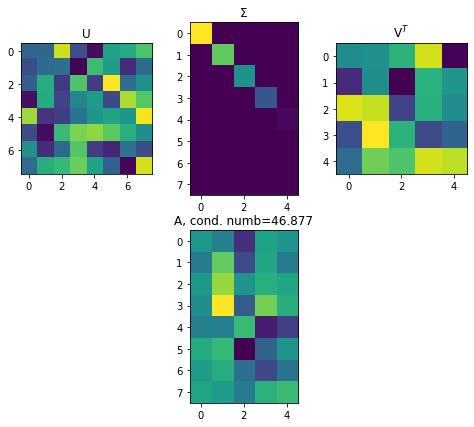

In [340]:
fig = plt.subplots(1,figsize=(8,7))

plt.subplot(231)
plt.imshow(U)
plt.title('U')

plt.subplot(232)
plt.imshow(S)
plt.title('$\Sigma$')

plt.subplot(233)
plt.imshow(V)
plt.title('V$^T$')

plt.subplot(235)
plt.imshow(A)
plt.title('A, cond. numb=%g'%condnumA)

plt.show()

### Why you avoid the inverse?

In [474]:
m = 6
n = 6
condn = 67

# Create a matrix with known condition number
U,R = np.linalg.qr(np.random.randn(m,n))
V,R = np.linalg.qr(np.random.randn(m,n))
s = np.linspace(condn,1,m)
S = np.zeros((m,n))

for i in range(len(s)):
    S[i,i] = s[i]
A = U@S@V.T

# Compute its explicit inverse
Ainv = np.linalg.inv(A)

# Multiply the two matrices to get I
I = Ainv@A

# Compute the norm of the difference between I and eye
eye = np.eye(m)
print(I-eye)
normdiff = np.linalg.norm(I-eye)
normdiff

[[ 8.88178420e-16  8.88178420e-16  0.00000000e+00  6.66133815e-16
   0.00000000e+00  2.22044605e-16]
 [ 2.22044605e-16  4.44089210e-16  1.11022302e-15  0.00000000e+00
   8.88178420e-16  2.22044605e-16]
 [ 5.55111512e-17 -1.11022302e-16  4.44089210e-16 -2.77555756e-17
  -1.66533454e-16  2.77555756e-17]
 [-1.77635684e-15 -1.77635684e-15  2.22044605e-15 -4.44089210e-16
  -1.77635684e-15  4.44089210e-16]
 [ 0.00000000e+00  1.11022302e-16  1.11022302e-16  1.11022302e-16
   0.00000000e+00  2.77555756e-17]
 [-8.88178420e-16 -8.88178420e-16  2.66453526e-15 -4.44089210e-16
   0.00000000e+00  2.22044605e-16]]


5.327552418927811e-15

C:\Users\Milo\AppData\Local\Temp/ipykernel_10372/1616047649.py:23: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(condnums,msize,invdiffs,vmax=np.max(invdiffs)*.6)


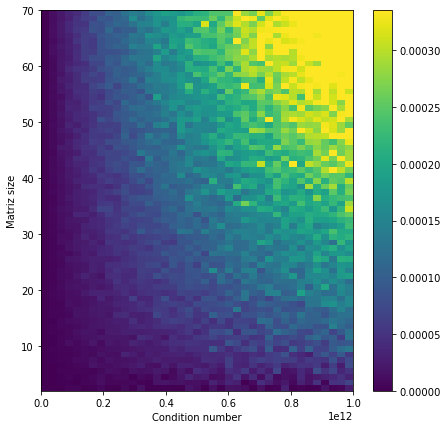

In [492]:
# Matrix sizes
msize = np.arange(2,71)
# Condition numbers
condnums = np.linspace(10,1e12,40)

invdiffs = np.zeros((len(msize),len(condnums)))

for mi,M in enumerate(msize):
    for ci,C in enumerate(condnums):
        
        # Create A
        U,R = np.linalg.qr(np.random.randn(M,M))
        V,R = np.linalg.qr(np.random.randn(M,M))
        S = np.diag(np.linspace(C,1,M))
        A = U@S@V
    
        # Compute difference from identity matrix
        I = A@np.linalg.inv(A)
        Idiff = np.abs(I-np.eye(M))
        invdiffs[mi,ci] = np.linalg.norm(Idiff)
        
fig = plt.figure(figsize=(7,7))
plt.pcolormesh(condnums,msize,invdiffs,vmax=np.max(invdiffs)*.6)
plt.xlabel('Condition number')
plt.ylabel('Matriz size')
plt.colorbar()

plt.show()

In [458]:
print(np.diag(np.linspace(34,4,5)))

[[34.   0.   0.   0.   0. ]
 [ 0.  26.5  0.   0.   0. ]
 [ 0.   0.  19.   0.   0. ]
 [ 0.   0.   0.  11.5  0. ]
 [ 0.   0.   0.   0.   4. ]]


### SVD, eig A^TA and AA^T produce the same eigenspaces

In [559]:
from mpl_toolkits.mplot3d import Axes3D
m = 2
n = 3
M = np.random.randn(m,n)

[[-0.35468006  0.93498773]
 [-0.93498773 -0.35468006]]
[[-0.93498773 -0.35468006]
 [ 0.35468006 -0.93498773]]
[[-0.25080153 -0.84258609 -0.47659971]
 [-0.41032047  0.53845002 -0.73600862]
 [-0.87677574 -0.01096653  0.48077441]]
[[-0.25080153  0.84258609 -0.47659971]
 [-0.41032047 -0.53845002 -0.73600862]
 [-0.87677574  0.01096653  0.48077441]]


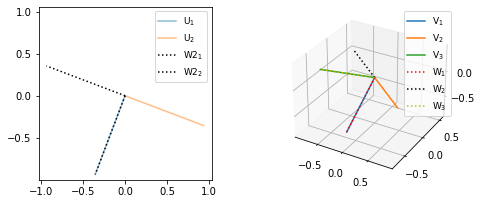

In [583]:
U,S,V = np.linalg.svd(M)
V = V.T
D,W = np.linalg.eig(M.T@M)
D2,W2 = np.linalg.eig(M@M.T)
# print(np.sqrt(D))
# print(np.sqrt(D2))
# print(S)

print(U)
print(W2)

print(W)
print(V)
fig = plt.subplots(1,figsize=(8,7))

plt.subplot(221)
plt.plot([0,U[0,0]],[0,U[1,0]],alpha=.5,label=('U$_1$'))
plt.plot([0,U[0,1]],[0,U[1,1]],alpha=.5,label=('U$_2$'))

plt.plot([0,W2[0,1]],[0,W2[1,1]],'k:',label=('W2$_1$'))
plt.plot([0,W2[0,0]],[0,W2[1,0]],'k:',label=('W2$_2$'))

plt.axis('square')
plt.legend(fontsize=9)

plt.subplot(222,projection='3d')
plt.plot([0,V[0,0]],[0,V[1,0]],[0,V[2,0]],label=('V$_1$'))
plt.plot([0,V[0,1]],[0,V[1,1]],[0,V[2,1]],label=('V$_2$'))
plt.plot([0,V[0,2]],[0,V[1,2]],[0,V[2,2]],label=('V$_3$'))

plt.plot([0,W[0,0]],[0,W[1,0]],[0,W[2,0]],'r:',label=('W$_1$'))
plt.plot([0,W[0,1]],[0,W[1,1]],[0,W[2,1]],'k:',label=('W$_2$'))
plt.plot([0,W[0,2]],[0,W[1,2]],[0,W[2,2]],'y:',label=('W$_3$'))

plt.legend(fontsize=9)
plt.show()